# SCC-ICMC-USP - 1o. e 2o. semestre de 2021
# SCC5948/MAI5024 - Ciência de Dados - SCC5871/MAI5025 - Aprendizado de Máquina

### Profa. Roseli A. F. Romero

### PAE: Guilherme V. Nardari

Nro do grupo: Grupo 1

Alunos:


1.   Aleksander De Souza
2.   Artur Sousa Freitas
3.   Elias Pereira
4.   Thiago Vespa



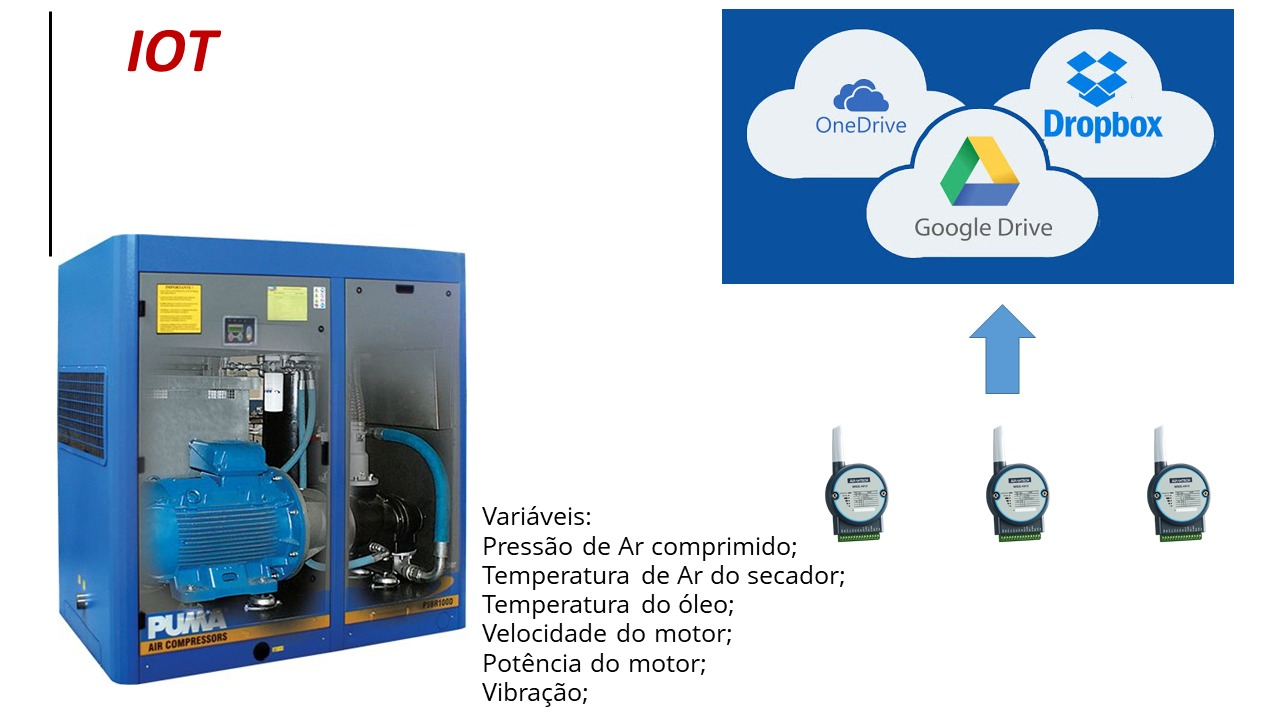

Para o artigo

1.   Apresentar o DataSet
2.   Exploração e pré-processamento
3.   Feature Selection
4.   Modelos de Classificação ou Regressão
5.   Forma de implementação
6.   Algoritmos de Aprendizado de Máquina
7.   Análise Preditiva

Etapas

*   [X] Obter dados dos compressores e sensores
  * Testes iniciais com compressor com sensores embarcados (IoT Ethernet I/O Module). Dados temporais (RTC).
*   [X] Há dados faltantes ou falhas de obtenção nos dados?
*   [X] Disponibilizar esses dados em tempo real via internet
*   [X] Identificar os tipos dos dados (num, cat) e sua semântica
*   [X] Limpar dados desnecessários
*   [X] Estruturar em um formato adequado
*   [X] Identificar os ranges possíveis
*   [X] Normalizar os dados?
*   [X] Precisamos de mais sensores?
*   [X] Identificar correlações válidas
*   [X] Remover a análise de sensores desnecessários?
*   [X] Aplicar PCA?
*   [X] Será necessário balancear os dados? Com falhas e sem falhas (classificação binária).
*   [X] Realizar estimativa (previsão) da ocorrência de falhas
*   [X] Realizar estimativa para manutenção antes de falhas
*   [X] Utilizar métricas para validar o modelo preditivo
*   [X] Gerar gráficos comparativos com a indicação do fabricante
*   [X] Gerar análise comparativa evidênciando se houve ou não falhas
*   [X] ROC?
*   [X] Produzir falhas nos equipamentos (obstrução da entrada de ar, superaquecimento, ...)
*   [X] Analiser novos dados coletados
*   [X] Validar com algoritmos mais eficientes como o XGBoost
*   [X] Analisar dados coletados
*   [X] Analisar a correlação de temperatura para somente equipamentos com falhas
*   [X] Treinar modelos
*   [X] Analisar a importância dos inputs para a decisão de manutenção
*   [X] Descrever sucintamente os algoritmos utilizados
*   [X] Gerar novo gráfico com os dados obtidos
*   [X] Acrescentar novos métodos
*   [X] Analisar e escrever resultados



In [ ]:
import pandas as pd
import time
from scipy.stats import norm
import seaborn as sns
import matplotlib as plt
import numpy as np



In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
dados_iot1_0 = pd.read_csv('/kaggle/input/iot-air-compressor/iot1_0.csv')
dados_iot1_1 = pd.read_csv('/kaggle/input/iot-air-compressor/iot1_1.csv')

#dados_iot1_0 = pd.read_csv('drive/MyDrive/Doutorado/artigo/iot1_0.csv')
#dados_iot1_1 = pd.read_csv('drive/MyDrive/Doutorado/artigo/iot1_1.csv')

iot1_copy = pd.concat([dados_iot1_0,dados_iot1_1])
iot1_copy
iot_1 = iot1_copy[['AI_0 PEgF','AI_1 PEgF', 'AI_2 PEgF']]/1000
iot_1
iot1 = iot_1.rename(columns={'AI_0 PEgF':'Air_Press','AI_1 PEgF':'Air_Temp', 'AI_2 PEgF':'Oil_Temp'})
iot1
# AI_0 PEgF = (essa coluna indica a pressão de ar do sistema Unidade BAR)

# AI_1 PEgF = (essa coluna indica a temperatura de AR após o Secador unidade Grau Celsius)

# AI_2 PEgF = (essa coluna indica a temperatura de oleo do compressor unidade Grau Celsius


In [ ]:
dados_iot2_0 = pd.read_csv('/kaggle/input/iot-air-compressor/iot2_0.csv')
dados_iot2_1 = pd.read_csv('/kaggle/input/iot-air-compressor/iot2_1.csv')

#dados_iot2_0 = pd.read_csv('drive/MyDrive/Doutorado/artigo/iot2_0.csv')
#dados_iot2_1 = pd.read_csv('drive/MyDrive/Doutorado/artigo/iot2_1.csv')

iot2_copy = pd.concat([dados_iot2_0,dados_iot2_1])
iot2_copy
iot_2 = iot2_copy[['AI_0 PEgF', 'AI_1 PEgF', 'AI_2 PEgF']]/1000
iot2 = iot_2.rename(columns={'AI_0 PEgF':'Frequency', 'AI_1 PEgF':'Potency', 'AI_2 PEgF':'Vibration'})
iot2.drop(iot2.tail(29).index,inplace=True) 
iot2

# AI_0 PEgF = (essa coluna indica a velocidade do motor unidade Hz)

# AI_1 PEgF = (essa coluna indica a potencia do motor unidade Watt)

# AI_2 PEgF = (essa coluna indica a vibração do sistema unidade mm/s

In [ ]:
full_dados_iot2 = pd.read_csv('/kaggle/input/io2-basecsv/iot2_base.csv')
#full_dados_iot2 = pd.read_csv('drive/MyDrive/Doutorado/artigo/iot2_base.csv')
full_dados_iot2



In [ ]:
# juntar os frames
iots = pd.concat([iot1,iot2],axis=1)
iots

In [ ]:
iots.describe()
iots.head(3)

In [ ]:
def quatro_momentos(df, nome_attr):
    data = df[nome_attr]
    print(f'Média: {data.mean()}')  # ou np.mean
    print(f'Variância: {data.var()}') # ou np.var
    print(f'Obliquidade: {data.skew()}') # ou stats.skew
    print(f'Kurtose: {data.kurtosis()}') # ou stats.kurtosis

print('Momentos da coluna press_ar')
quatro_momentos(iots,'Air_Press')
print('\n')
print('Momentos da coluna temp_ar')
quatro_momentos(iots,'Air_Temp')
print('\n')
print('Momentos da coluna temp_oleo')
quatro_momentos(iots,'Oil_Temp')
print('\n')
print('Momentos da coluna vel_motor')
quatro_momentos(iots,'Frequency')
print('\n')
print('Momentos da coluna pot_motor')
quatro_momentos(iots,'Potency')
print('\n')
print('Momentos da coluna vibracao')
quatro_momentos(iots,'Vibration')

In [ ]:
def hist(df, nome_attr,titulo):
    df[nome_attr].plot.hist(title=titulo, density=1)
    
    df[nome_attr].plot.kde()

    normal = pd.Series(norm.rvs(
        df[nome_attr].mean(), 
        df[nome_attr].std(),size=10))
    
    normal.plot.kde()

iots.hist()


#hist(iots,'Air_Press','Air Pressure')
#hist(iots,'Air_Temp','Air Temperature')
#hist(iots,'Oil_Temp','Oil Temperature')
#hist(iots,'Frequency','Frequency or Speed')
#hist(iots,'Potency','Potency')
#hist(iots,'Vibration', 'Vibration')


In [ ]:
def boxplot(df,name_attr):
    df.boxplot(name_attr)

#boxplot(iots,'Air_Press')
#boxplot(iots,'Air_Temp')
#boxplot(iots,'Oil_Temp')
#boxplot(iots,'Frequency')
#boxplot(iots,'Potency')
boxplot(iots,'Vibration')


In [ ]:
col1 = iots['Air_Press'].values
print('Pressão do ar:\nMáximo: {}\nMínimo: {}\n'.format(col1.max(),col1.min()))

col2 = iots['Air_Temp'].values
print('Temperatura ar de saída:\nMáximo: {}\nMínimo: {}\n'.format(col2.max(),col2.min()))

col3 = iots['Oil_Temp'].values
print('Temperatura do óleo:\nMáximo: {}\nMínimo: {}\n'.format(col3.max(),col3.min()))

col4 = iots['Frequency'].values
print('Velocidade do motor:\nMáximo: {}\nMínimo: {}\n'.format(col4.max(),col4.min()))

col5 = iots['Potency'].values
print('Potência do motorl:\nMáximo: {}\nMínimo: {}\n'.format(col5.max(),col5.min()))

col6 = iots['Vibration'].values
print('Vibração:\nMáximo: {}\nMínimo: {}\n'.format(col6.max(),col6.min()))





In [ ]:
sns.kdeplot(iots['Air_Press'], shade=True,color='blue')

In [ ]:
sns.kdeplot(iots['Air_Temp'], shade=True)
# press_ar	temp_ar	temp_oleo	vel_motor	pot_motor	vibracao


In [ ]:
sns.kdeplot(iots['Oil_Temp'],shade=True,color='red')

In [ ]:
sns.kdeplot(iots['Frequency'],shade=True,color='black')

In [ ]:
# press_ar	temp_ar	temp_oleo	vel_motor	pot_motor	vibracao
sns.kdeplot(iots['Potency'],shade=True,color='brown')

In [ ]:
    sns.kdeplot(iots['Vibration'],shade=True,color='purple')

In [ ]:
plt.rcParams['figure.figsize'] = [25, 20]
# Matriz de covariância
iots_cov = np.cov(iots.iloc[:,:], rowvar=False)
df_iots_cov = iots.cov()

#sns.heatmap(df_iots_cov)
print(df_iots_cov)

In [ ]:
plt.rcParams['figure.figsize'] = [10, 6]
#plt.title('')
df_iots_corr = iots.corr(method='pearson')

sns.heatmap(df_iots_corr, annot=True)

print(df_iots_corr)
# Forte correlação da temperatura do ar com a do óleo
# Forte correlação da velocidade o motor com a potência

In [ ]:
%matplotlib inline
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
corr_spearman = iots.corr(method='spearman')
ax = plt.axes()
sns.heatmap(corr_spearman,ax=ax)
ax.set_title("Correlation Spearman Matrix")
plt.show()

plt.rcParams['figure.figsize'] = [25,20]

In [ ]:
import matplotlib.pyplot as plt

triu = np.triu(corr_spearman) # triângulo superior

# Par com menor correlação
minA = np.where(triu == np.min(triu))
min1 = minA[0][0]
min2 = minA[1][0]
minC1 = corr_spearman.columns[min1]
minC2 = corr_spearman.columns[min2]
minDesc = "Menor Valor de Correlação: " + minC1 + "," + minC2


# Par com maior correlação
np.fill_diagonal(triu, 0) #Desconsiderar diagonal
maxA = np.where(triu == np.max(triu))
max1 = maxA[0][0]
max2 = maxA[1][0]
maxC1 = corr_spearman.columns[max1]
maxC2 = corr_spearman.columns[max2]
maxDesc = "Maior Valor de Correlação: " + maxC1 + "," + maxC2;

print(maxDesc)
print(minDesc)

print(corr_spearman)


# # Verificação
# sns.pairplot(iris_novo, hue='F')

In [ ]:
full_dados = full_dados_iot2.iloc[:,-3:]
full_dados

In [ ]:
# from random import gauss


#comp_oil_ok = full_dados[full_dados['Oil_Temp'] > 76].copy()
#comp_oil_ok['Maintenance'] = 0
#comp_oil_not_ok = full_dados[full_dados['Oil_Temp'] <= 76].copy()
#comp_oil_not_ok['Maintenance'] = 1

# Dados OK
#dff = iots.copy(deep=False)
#dff['Maintenance'] = 0

# Dados sintéticos para testes
#dffailoil = dff.sample(frac=0.15)
#dffailair = dff.sample(frac=0.10)
#dffailnoise = dff.sample(frac=1)

# Temperatura do óleo maior que 110
#dffailoil['Oil_Temp'] = 110+gauss(0, 15)
#dffailoil['Maintenance'] = 1
# Temperatura do ar maior que 4
#dffailair['Air_Temp'] = 4+gauss(0, 2)
#dffailoil['Maintenance'] = 1

# Ruído
#dffailnoise['Air_Press'] = gauss(0, 6)
#dffailnoise['Vibration'] = gauss(0, 7)
#dffailnoise['Maintenance'] = 1


#dffinal = pd.concat([dff, dffailoil, dffailair, dffailnoise])
#dfrand = dffinal.sample(frac=1).reset_index(drop=True)
#dfrand

#comp_oil_not_ok

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.pipeline import make_pipeline

def splitdata(p_train, X, y):
    p_test = 1 - p_train 
  # Divisão em conjunto de testes e treino
    return train_test_split(X, y, stratify=y, test_size=p_test, random_state=2)

def preprocess(x_treino, x_teste, y_treino, y_teste):
  
  # Normalização e Redução de dimensionalidade
#    pca = PCA(n_components=5)
#    std_clf = make_pipeline(StandardScaler(),  pca)
    std_clf = make_pipeline(StandardScaler())
  
  # std_clf = SelectKBest(chi2,k=10) # Para seleçãão de colunas
  
    std_clf.fit_transform(x_treino, y_treino)
    std_clf.transform(x_teste)
  # print(f'PCA Var Ratio: {pca.explained_variance_ratio_}')

    return x_treino, x_teste, y_treino, y_teste


#classe_Neg = comp_oil_ok
#classe_Pos = comp_oil_not_ok

# Sampling
#data_v = pd.concat([classe_Neg.sample(n=len(classe_Pos), replace=True), classe_Pos]) # 1249636
#data_v = data_v.sample(500000)
data_v = full_dados
data_v = data_v.sample(500000)
data_v

In [ ]:
p_treino = 0.8 # 80% treino
X = data_v.iloc[:,:-1]
y = data_v.iloc[:,-1:]
X_train, X_test, y_train, y_test = splitdata(p_treino, X, y)

print(X_train.shape)
print(X_test.shape)


In [ ]:
#preprocess(X_train, X_test, y_train, y_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


regressores = {}
regressores = {
  "LinearRegression" : {"modelo": LinearRegression(), "scores": []},
  "DecisionTreeRegressor" : {"modelo": DecisionTreeRegressor(), "scores": []},
  "RandomForestRegressor" : {"modelo": RandomForestRegressor(), "scores": []},
  #"SVR(kernel='rbf')" : {"modelo": SVR(kernel='rbf'), "scores": []},
  "XGBRegressor" : {"modelo": XGBRegressor(objective="reg:squarederror"), "scores": []},
}

regressores_label = ['LinearRegression','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
rmse_lst = []
r2_lst = []


for reg_name in regressores:  
  reg = regressores[reg_name]
  c = reg['modelo'].fit(X_train, y_train.values.ravel())
  y_pred = c.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)
  #reg['scores'] = {'rmse': rmse, 'r2':r2}
  rmse_lst.append(rmse)
  r2_lst.append(r2)
  print('RMSE: ', rmse)
  print('R2: ', r2)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8))
  

plt.rcParams['figure.figsize'] = [15, 15]

plt.subplot(2,2,1)
#This will create the bar graph for poulation
rmse = plt.barh(regressores_label, rmse_lst, color='r')
plt.xlabel('RMSE')

#The below code will create the second plot.
plt.subplot(2,2,2)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
gdp =plt.barh(regressores_label, r2_lst, color='g')
plt.xlabel('R2 Score')
# for index, value in enumerate(r2_lst):
#     plt.text(value, index, str(value))
plt.yticks([],[])
plt.show
plt.show()